In [1]:
import numpy as np
import matplotlib.pyplot as plt
from placerg.funcs import *

In [2]:
N=1024
nstim=3
choice=[0,1]
percell = 2 # on average, number of nonplace stimuli per cell
# for example, I assign on average percell nonplace fields to every cell
# must be natural number
placeprob = np.array([.5,.5]) # probability that cell is coupled to place field
# [p(not coupled), p(coupled)]     
npprob=np.array([1-percell/(nstim),percell/(nstim)]) 
# probability that cell is coupled to percell fields
bothprob = np.array([.5,.5]) # probability that cell is coupled 
# to both place and nonplace field
# [p(not coupled), p(coupled)] 
    
# now initialize distribution parameters of fields and couplings
# here the place field couplings will be gamma distributed
# the nonplace field couplings will be normally distributed

vj = .5 # mean of couplings for nonplace fields
                
vjplace = 1. # mean of couplings for place fields

sj = .5 # standard deviation of couplings for nonplace fields

sjplace = .5  # standard deviation of couplings for place fields
const=1./np.sqrt(percell)
const2=1.
J=np.zeros((N+nstim, N))

In [3]:
J[:N, :] = gamma(vjplace, sjplace, N)*np.diagflat(\
        np.random.choice(choice,(N,), p=placeprob)) 
wnp = np.array(np.where(J[(np.diag_indices(J[:N,:].shape[1]))] ==0)).flatten()

(-1.1056073143289207,
 1.1002670149680438,
 -1.1065546148086052,
 1.10342588525708)

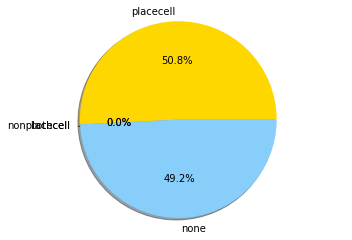

In [4]:
counts=np.array((np.count_nonzero(J[:N,:],\
                axis=0),np.count_nonzero(J[N:,:], axis=0))) 
placecell=np.array(\
                np.where(np.logical_and(counts[0,:] != 0.,\
                counts[1,:] == 0.))).flatten()
nonplacecell=np.array(\
                np.where(np.logical_and(counts[0,:] == 0.,\
                counts[1,:] != 0.))).flatten()
bothcell=np.array(np.where(np.logical_and(counts[0,:] \
                != 0., counts[1,:] != 0.))).flatten() 
nothing=N-placecell.size-nonplacecell.size-bothcell.size
netstats=[placecell.size, nonplacecell.size, bothcell.size, nothing]
labels = ['placecell', 'nonplacecell', 'bothcell', 'none']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']

# Plot
plt.pie(netstats, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal')

In [5]:
# recall that choice is [0,1]
J[N:,wnp] = const*np.random.normal(vj, sj, \
            J[N:, wnp].shape)* np.random.choice(choice, J[N:,wnp].shape, \
            p=npprob)

    # coupling matrix for place field
    # Note that if a cell is coupled to a place field, it is only coupled to 
    # one place field.
    # This is accomplished by setting the diagonal of the place fields section 
    # of the coupling matrix to 1 and 
    # everything else to 0
    # the place field couplings are always positive and gamma distributed. 
    # having only positive couplings will ensure that the cells will spike 
    # when the place field waveform spikes


In [6]:
nones=np.array(np.where(np.sum(J,axis=0)==0)).flatten()
inds=np.random.randint(0, high=nstim, size=nones.size)
J[N+inds,nones]+=const*np.random.normal(vj, sj, \
            J[N:,nones][inds,np.arange(nones.size)].shape)

In [7]:
wnp = np.array(np.where(J[(np.diag_indices(J[:N,:].shape[1]))] ==0)).flatten()
countcells=np.array((np.count_nonzero(J[N:,wnp],axis=0)))

In [8]:
np.mean(countcells)

1.9900793650793651

(-1.1056073143289207,
 1.1002670149680438,
 -1.1065546148086052,
 1.10342588525708)

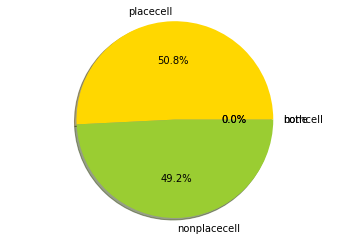

In [9]:
counts=np.array((np.count_nonzero(J[:N,:],\
                axis=0),np.count_nonzero(J[N:,:], axis=0))) 
placecell=np.array(\
                np.where(np.logical_and(counts[0,:] != 0.,\
                counts[1,:] == 0.))).flatten()
nonplacecell=np.array(\
                np.where(np.logical_and(counts[0,:] == 0.,\
                counts[1,:] != 0.))).flatten()
bothcell=np.array(np.where(np.logical_and(counts[0,:] \
                != 0., counts[1,:] != 0.))).flatten() 
nothing=N-placecell.size-nonplacecell.size-bothcell.size
netstats=[placecell.size, nonplacecell.size, bothcell.size, nothing]
labels = ['placecell', 'nonplacecell', 'bothcell', 'none']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']

# Plot
plt.pie(netstats, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal')

In [10]:
J[wnp,wnp] = np.reshape(gamma(vjplace, sjplace, J[wnp,wnp].size), J[wnp,wnp].shape)* np.random.choice(choice, J[wnp,wnp].shape, \
            p=bothprob)

(-1.1056073143289207,
 1.1002670149680438,
 -1.1017749103299537,
 1.1031982802819063)

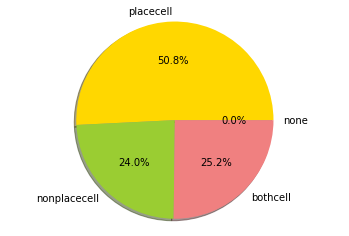

In [11]:
counts=np.array((np.count_nonzero(J[:N,:],\
                axis=0),np.count_nonzero(J[N:,:], axis=0))) 
placecell=np.array(\
                np.where(np.logical_and(counts[0,:] != 0.,\
                counts[1,:] == 0.))).flatten()
nonplacecell=np.array(\
                np.where(np.logical_and(counts[0,:] == 0.,\
                counts[1,:] != 0.))).flatten()
bothcell=np.array(np.where(np.logical_and(counts[0,:] \
                != 0., counts[1,:] != 0.))).flatten() 
nothing=N-placecell.size-nonplacecell.size-bothcell.size
netstats=[placecell.size, nonplacecell.size, bothcell.size, nothing]
labels = ['placecell', 'nonplacecell', 'bothcell', 'none']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']

# Plot
plt.pie(netstats, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal')

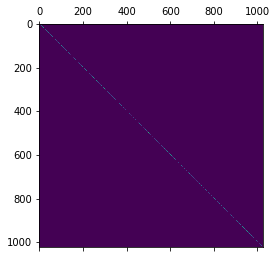

In [12]:
plt.matshow(J[:N,:])

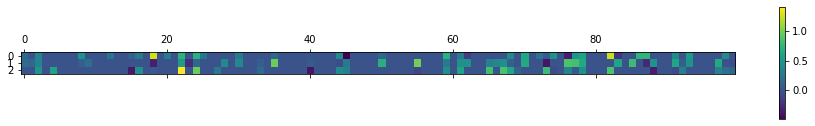

In [13]:
plt.matshow(J[N:,:100])

plt.colorbar()